In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import yfinance as yfin

from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM
yfin.pdr_override()

In [34]:
# declare variable
company = 'aapl'
train_start = '2012-01-01'
train_end = '2021-01-01'
test_start = '2021-01-01'
test_end = '2023-01-01'
prediction_days = 60
model = load_model('aapl.h5')
scaler = MinMaxScaler(feature_range=(0, 1))

16/16 [==============================] - 0s 24ms/step


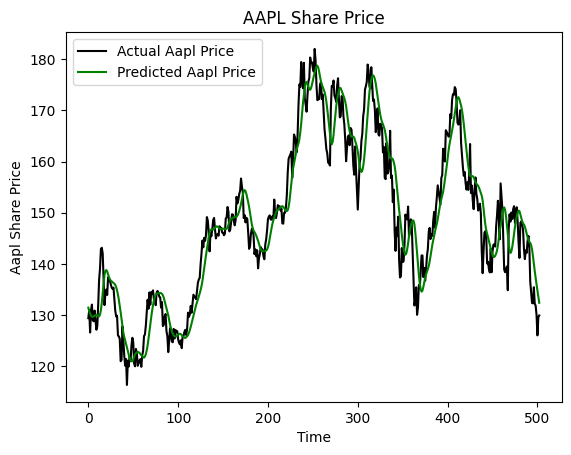

In [ ]:
data = pd.read_csv(f"train_data/{company.lower()}.csv")

test_data = pd.read_csv(f"test_data/{company.lower()}.csv")
actual_prices = test_data['Close'].values

scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)


model_inputs = total_dataset[len(total_dataset) - len(test_data)- prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# for i in range (4, 100):
#   predicted_prices = np.append(predicted_prices, 25) # use this for calculate

# plot the test predictions
plt.plot(actual_prices, color='black', label=f'Actual {company.capitalize()} Price')
plt.plot(predicted_prices, color='green', label=f'Predicted {company.capitalize()} Price')
plt.title(f'{company.upper()} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{company.capitalize()} Share Price')
plt.legend()
plt.show()

1/1 [==============================] - 0s 31ms/step


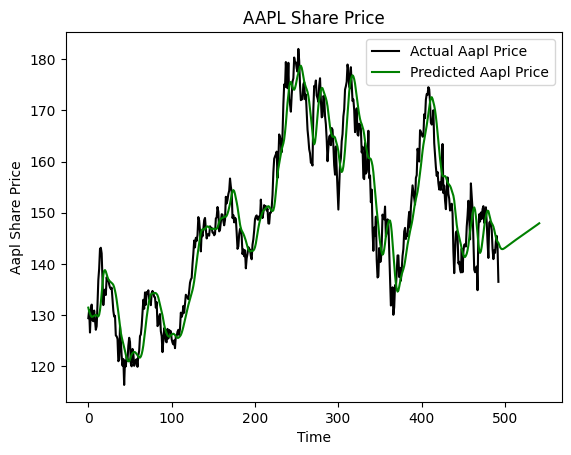

In [ ]:
data = pd.read_csv(f"train_data/{company.lower()}.csv")

test_data = pd.read_csv(f"test_data/{company.lower()}_predict_on_predict.csv")
actual_prices = test_data['Close'].values

scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)


model_inputs = total_dataset[len(total_dataset) - len(test_data)- prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# for i in range (4, 100):
#   predicted_prices = np.append(predicted_prices, 25) # use this for calculate

current = 1
next_days = 50

real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0]]
real_data_np = np.array(real_data)
real_data_np = np.reshape(real_data_np, (real_data_np.shape[0], real_data_np.shape[1], 1))

prediction = model.predict(real_data_np)
inverse_price = scaler.inverse_transform(prediction)

while current < next_days:
  predicted_prices = np.append(predicted_prices, inverse_price)
  
  real_data[0] = np.delete(real_data, 0)
  real_data[0] = np.append(real_data, prediction)

  real_data_np = np.array(real_data)
  real_data_np = np.reshape(real_data_np, (real_data_np.shape[0], real_data_np.shape[1], 1))

  prediction = model.predict(real_data_np)
  inverse_price = scaler.inverse_transform(prediction)
  current += 1


# plot the test predictions
plt.plot(actual_prices, color='black', label=f'Actual {company.capitalize()} Price')
plt.plot(predicted_prices, color='green', label=f'Predicted {company.capitalize()} Price')
plt.title(f'{company.upper()} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{company.capitalize()} Share Price')
plt.legend()
plt.show()

In [ ]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

1/1 [==============================] - 1s 1s/step
Prediction: [[131.46396]]
